In [41]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from lib.FolderStructure import FolderStructure
from lib.DriftData import DriftData

#rootDir ="C:/workspaces/AnjutkaVideo/Kara_Sea_Crab_Video_st_5993_2018/"
#videoFileName = "V3__R_20180915_205551"
#videoFileName = "V4__R_20180915_210447"
#videoFileName = "V6__R_20180915_212238"

#rootDir = "C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBlagopoluchiyaBay2018/"
#videoFileName = "V3_R_20180911_170159"
#videoFileName = "V2_R_20180911_165730"
#videoFileName = "V1_R_20180911_165259"

rootDir ="C:/workspaces/AnjutkaVideo/2019-Kara/St6279_19"
videoFileName = "V2"

folderStruct = FolderStructure(rootDir, videoFileName)

drifts = DriftData.createFromFile(folderStruct.getRawDriftsFilepath())
data = drifts.getDF()
drifts.getCount()

9233

In [43]:
drifts.interpolate()
data = drifts.getDF()

In [ ]:
data.loc[(data['frameNumber'] > 9390)].head(30)

In [4]:
#replaceOutlierBetweenTwoPoints('driftY',20)

In [5]:
#replaceIfThirdIsOutlier2('driftY', 30, -20, 100)

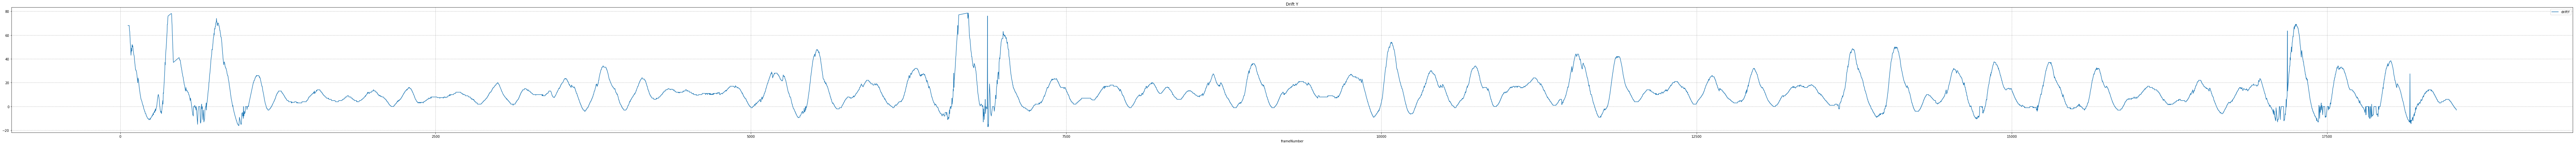

In [45]:
data.plot( x='frameNumber', y='driftY',figsize=(140,7), title="Drift Y")#.savefig('MaximPlotDriftY.png', dpi=300)
plt.gca().grid(which='major', axis='both', linestyle='--') 
#save to File
#plt.savefig('driftsY_7.png', format='png', dpi=300)

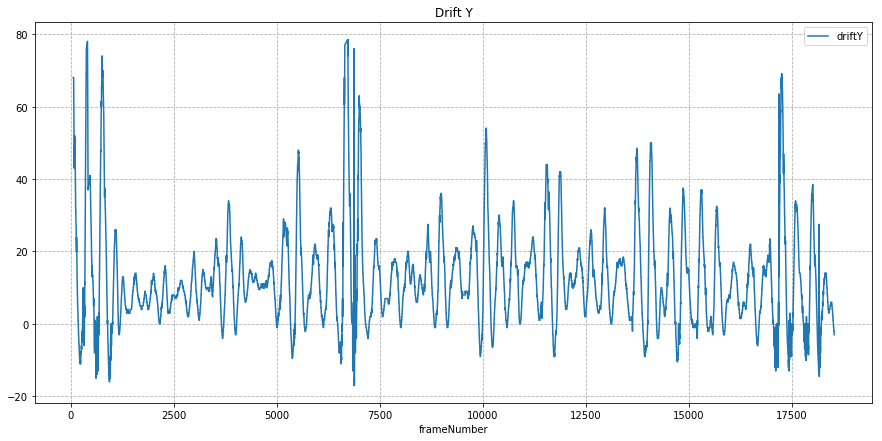

In [44]:
#data.loc[data['frameNumber'] > 3010].loc[data['frameNumber'] < 3400].plot( x='frameNumber', y='driftY',figsize=(15,7))
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title="Drift Y")
plt.gca().grid(which='major', axis='both', linestyle='--') 
#data.loc[(data['driftY'] < -30) | (data['driftY'] > 100)].count()[0]


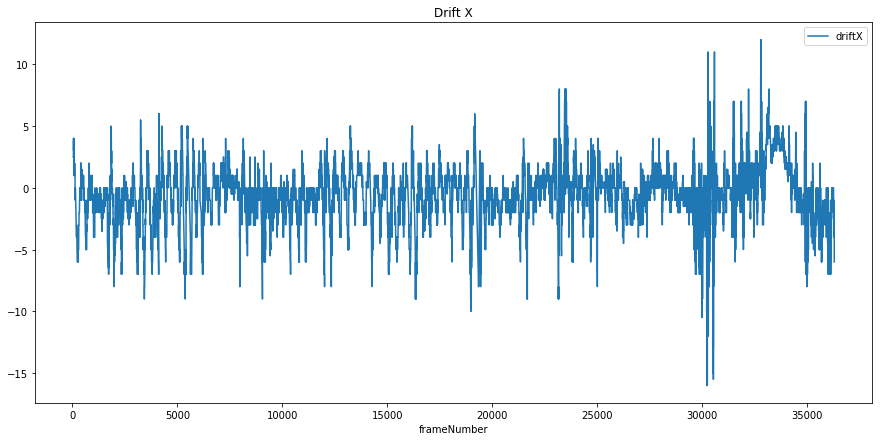

In [39]:
data.plot( x='frameNumber', y='driftX',figsize=(15,7), title="Drift X")

In [40]:
folderStruct = FolderStructure(rootDir, videoFileName)
#drifts.saveToFile(folderStruct.getDriftsFilepath())

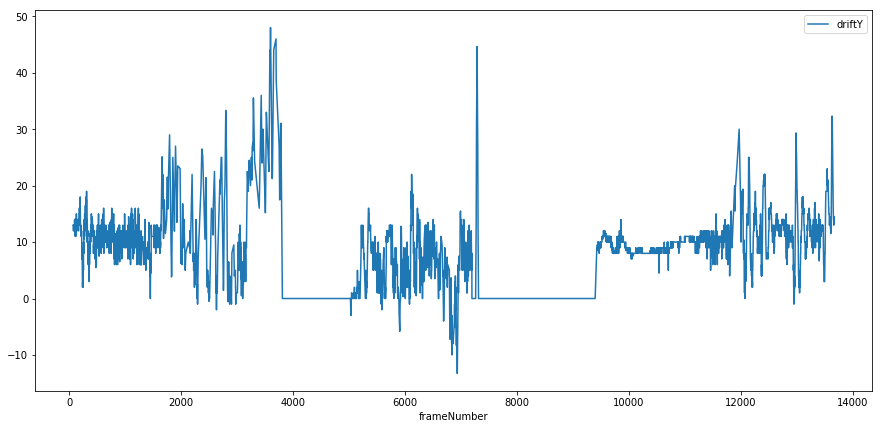

In [9]:
video_filename="V1_R_20180911_165259"
directory="C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBlagopoluchiyaBay2018/"+video_filename+"/"

input_filename=video_filename+"_drifts_bck_no_interpolate.csv"
input_filepath=directory+"/"+input_filename
data1 = pd.read_csv(input_filepath,delimiter="\t",na_values="(null)") 
#data1.loc[data1['frameNumber'] > 2000].loc[data1['frameNumber'] < 3800].plot( x='frameNumber', y='driftY',figsize=(15,7))
data1.loc[data1['frameNumber'] > -2000].loc[data1['frameNumber'] < 30800].plot( x='frameNumber', y='driftY',figsize=(15,7))

In [10]:
#Correct "single outliers" (where prev and next data points are not outliers)
def replaceOutlierBetweenTwoPoints(colName, normalJump):
    col = data[colName]
    prev=col.shift(periods=1)
    next=col.shift(periods=-1)
    diffNextPrev=abs(prev - next)
    meanPrevNext=(next+prev)/2
    deviation = abs(col-meanPrevNext)
    single_outlier = (deviation > normalJump) & (diffNextPrev < normalJump)
    data[colName] = col.mask(single_outlier, meanPrevNext)    
    
def replaceIfThirdIsOutlier2(colName, normalJump, normalMin, normalMax):
    
    #outlierThreshold = 30
    #normalJump = 5
    
    col = data[colName]
    prevPrev=col.shift(periods=2)
    nextNext=col.shift(periods=-2)
    prev=col.shift(periods=1)
    next=col.shift(periods=-1)

    meanPrevs=(prevPrev + prev)/2
    deviation = abs(col-meanPrevs)

    diffPrevs=prev-prevPrev
    
    
    #outlier_fromPrevs = (deviationY > outlierThreshold) & (abs(diffPrevsY) < normalJump)
    prevsAreNotOutliers = (abs(diffPrevs) < normalJump) & (prevPrev>normalMin) & (prevPrev<normalMax) & (prev>normalMin) & (prev<normalMax)
    
    outlier_fromPrevs = ((col<normalMin) | (col>normalMax)) & (deviation > normalJump) & prevsAreNotOutliers
    
    data["prevsAreNotOutliers"] = prevsAreNotOutliers
    data["outlier_fromPrevs"] = outlier_fromPrevs
    data[colName] = col.mask(outlier_fromPrevs, prev+diffPrevs)    

In [11]:
data.loc[data['driftY'] < -30].count()[0]

0

In [12]:
data.loc[(data['driftX'] < -30) | (data['driftX'] > 30)].count()[0]

0

In [13]:
#data.loc[data['driftY'] != data['driftY_orig']].head(10) 
data.plot(x='frameNumber', y=['driftY_orig','driftX_orig'],figsize=(15,7), title="Original")

KeyError: "['driftY_orig' 'driftX_orig'] not in index"

In [ ]:
replaceOutlierBetweenTwoPoints('driftX', 8)
data.loc[(data['driftX'] < -30) | (data['driftX'] > 30)].count()[0]

In [ ]:
replaceIfThirdIsOutlier2('driftX',8,-25,25)
data.loc[(data['driftX'] < -30) | (data['driftX'] > 30)].count()[0]

In [ ]:
data.plot(x='frameNumber', y='driftX',figsize=(15,7), title="Original DriftX")
data.loc[(data['driftX'] < -30) | (data['driftX'] > 30)].count()[0]

In [ ]:
replaceOutlierBetweenTwoPoints('driftY',20)
data.loc[(data['driftY'] < -30) | (data['driftY'] > 100)].count()[0]

In [ ]:
replaceIfThirdIsOutlier2('driftY', 30, -20, 100)
data.loc[(data['driftY'] < -30) | (data['driftY'] > 100)].count()[0]

In [ ]:
#data.loc[data['frameNumber'] > 3010].loc[data['frameNumber'] < 3400].plot( x='frameNumber', y='driftY',figsize=(15,7))
data.plot( x='frameNumber', y='driftY',figsize=(15,7), title="Drift Y")
#data.loc[(data['driftY'] < -30) | (data['driftY'] > 100)].count()[0]

In [ ]:
#data.loc[data['frameNumber'] > 0].loc[data['frameNumber'] < 200].plot(kind="bar", x='frameNumber', y='driftY',figsize=(15,7), title="Iteration 5")

In [ ]:
#data.loc[data['frameNumber'] > 5350].loc[data['frameNumber'] < 5460].head(100)

In [ ]:
output_filename=video_filename+"_toCut.csv"
output_filepath=directory+"/"+output_filename
print(output_filepath)

In [ ]:
#data.to_csv(output_filepath, sep='\t')

In [ ]:
data = pd.read_csv(output_filepath,delimiter="\t",na_values="(null)") # 24 errors
#data.loc[data['frameNumber'] > 1000].loc[data['frameNumber'] < 3000].plot( x='frameNumber', y=['driftY','driftX'], figsize=(15,11), title="Iteration 5")
data.plot( x='frameNumber', y=['driftY','driftX'], figsize=(15,11), title="Iteration 5")
data.loc[data['driftY'] < -30].count()[0]